# 图像特效-水彩画

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/f1.jpg')
src2 = cv2.imread('../datas/f2.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(src2,cv2.COLOR_BGR2RGB)

In [20]:
def water_color(src):
    srcf = np.float32(src)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB).astype(np.float32)
    dst = np.zeros_like(srcf)
    srclab = cv2.cvtColor(src,cv2.COLOR_RGB2LAB).astype(np.float32)
    
    srcmean,srcstd = cv2.meanStdDev(srclab)
    dstlab = (srclab - srcmean[0]) * srcstd[0]

    dst = cv2.cvtColor(dstlab.astype(np.uint8),cv2.COLOR_LAB2RGB)
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

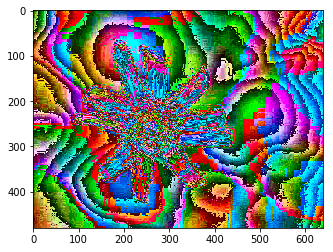

In [21]:
dst = water_color(src)
plt.imshow(dst)

In [28]:
def color_adjust(img):
    src_lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB).astype(np.float64)
    src_mean, src_stddev = cv2.meanStdDev(src_lab_img)
    mean_stddev = np.concatenate((src_mean, src_stddev), axis=0).reshape(1, -1)
    # Load the k-means fits predictor
#     predictor = loadPickle()
    # Check which class does this image belong to
#     class_label = predictor.predict(mean_stddev)
#     class_path = DATABASE_DIR + str(class_label[0]) + '/'
#     class_files = os.listdir(class_path)

    # Restore feature vectors
    fvs = np.array([[0, 0, 0, 0, 0, 0]], dtype=np.float64)

    # Calculate mean and stddev of all images inside the class
#     for i in range(len(class_files)):
#         imgfile = class_files[i]
    sampleimg = cv2.imread('../datas/f2.jpg')
    lab_sampleimg = cv2.cvtColor(sampleimg, cv2.COLOR_BGR2LAB)
    mean, stddev = cv2.meanStdDev(lab_sampleimg)
    mean_stddev = np.concatenate((mean, stddev), axis=0).reshape(6)
    fvs = np.vstack((fvs, mean_stddev))

    # Remove unused data
    fvs = fvs[1:]
    all_mean = np.mean(fvs, axis=0)
    sample_mean = all_mean[0:3]
    sample_stddev = all_mean[3:6]

    # Color transformation
    dst_lab_img = (sample_stddev / src_stddev.reshape(3)) * (src_lab_img - src_mean.reshape(3)) + sample_mean
    dst_lab_img = np.clip(dst_lab_img, 0, 255)
    
    # Transfer back to BGR channels
    dst_img = cv2.cvtColor(dst_lab_img.astype(np.uint8), cv2.COLOR_LAB2BGR)
    
    return dst_img

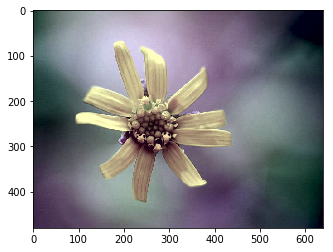

In [29]:
dst = color_adjust(rgb)
plt.imshow(dst)